In [272]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Simple Vizualization Packages
import seaborn as sn
from scipy.stats import skew, norm
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import stats 
import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor


import shap
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

print('TensorFlow Version', tf.__version__)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

direname = 'C:\\Users\\CharlesGormley\\Documents\\Personal\\Portfolio\\Kaggle\\Housing_Project\\Kaggle_Files\\house-prices-advanced-regression-techniques'

training_data = pd.read_csv(direname+'/train.csv')
testing_data = pd.read_csv(direname+'/test.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

TensorFlow Version 2.8.0


Exploratory Data Analysis

In [273]:
print(training_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [274]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


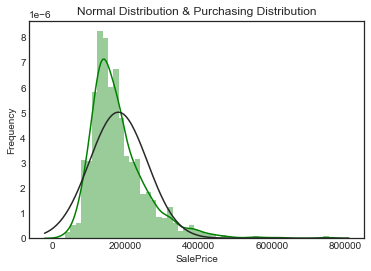

In [275]:
(mean, std_dev) = stats.norm.fit(training_data['SalePrice'])

def Normal_Distribution(mean, std_dev):
    plt.style.use('seaborn-white')
    plt.figure()
    sns.distplot(training_data['SalePrice'], hist=True, kde=True, fit = stats.norm, color='green')
    plt.title('Normal Distribution & Purchasing Distribution')
    plt.xlabel('SalePrice')
    plt.ylabel('Frequency')
    
    plt.show()
    
Normal_Distribution(mean, std_dev)


In [276]:
# Kurtosis & Skewness

# Perform a Normality Test to compare with the Kurtosis & Skewness
shapiro_test = stats.shapiro(training_data['SalePrice'])

print('Skewness: ' + str(training_data['SalePrice'].skew()))
print('Kurotosis: ' + str(training_data['SalePrice'].kurt()))
print('Test Statistic: '+ str(shapiro_test.statistic))
print('P-Value: ' + str(shapiro_test.pvalue))



Skewness: 1.8828757597682129
Kurotosis: 6.536281860064529
Test Statistic: 0.869671642780304
P-Value: 3.206247534576162e-33


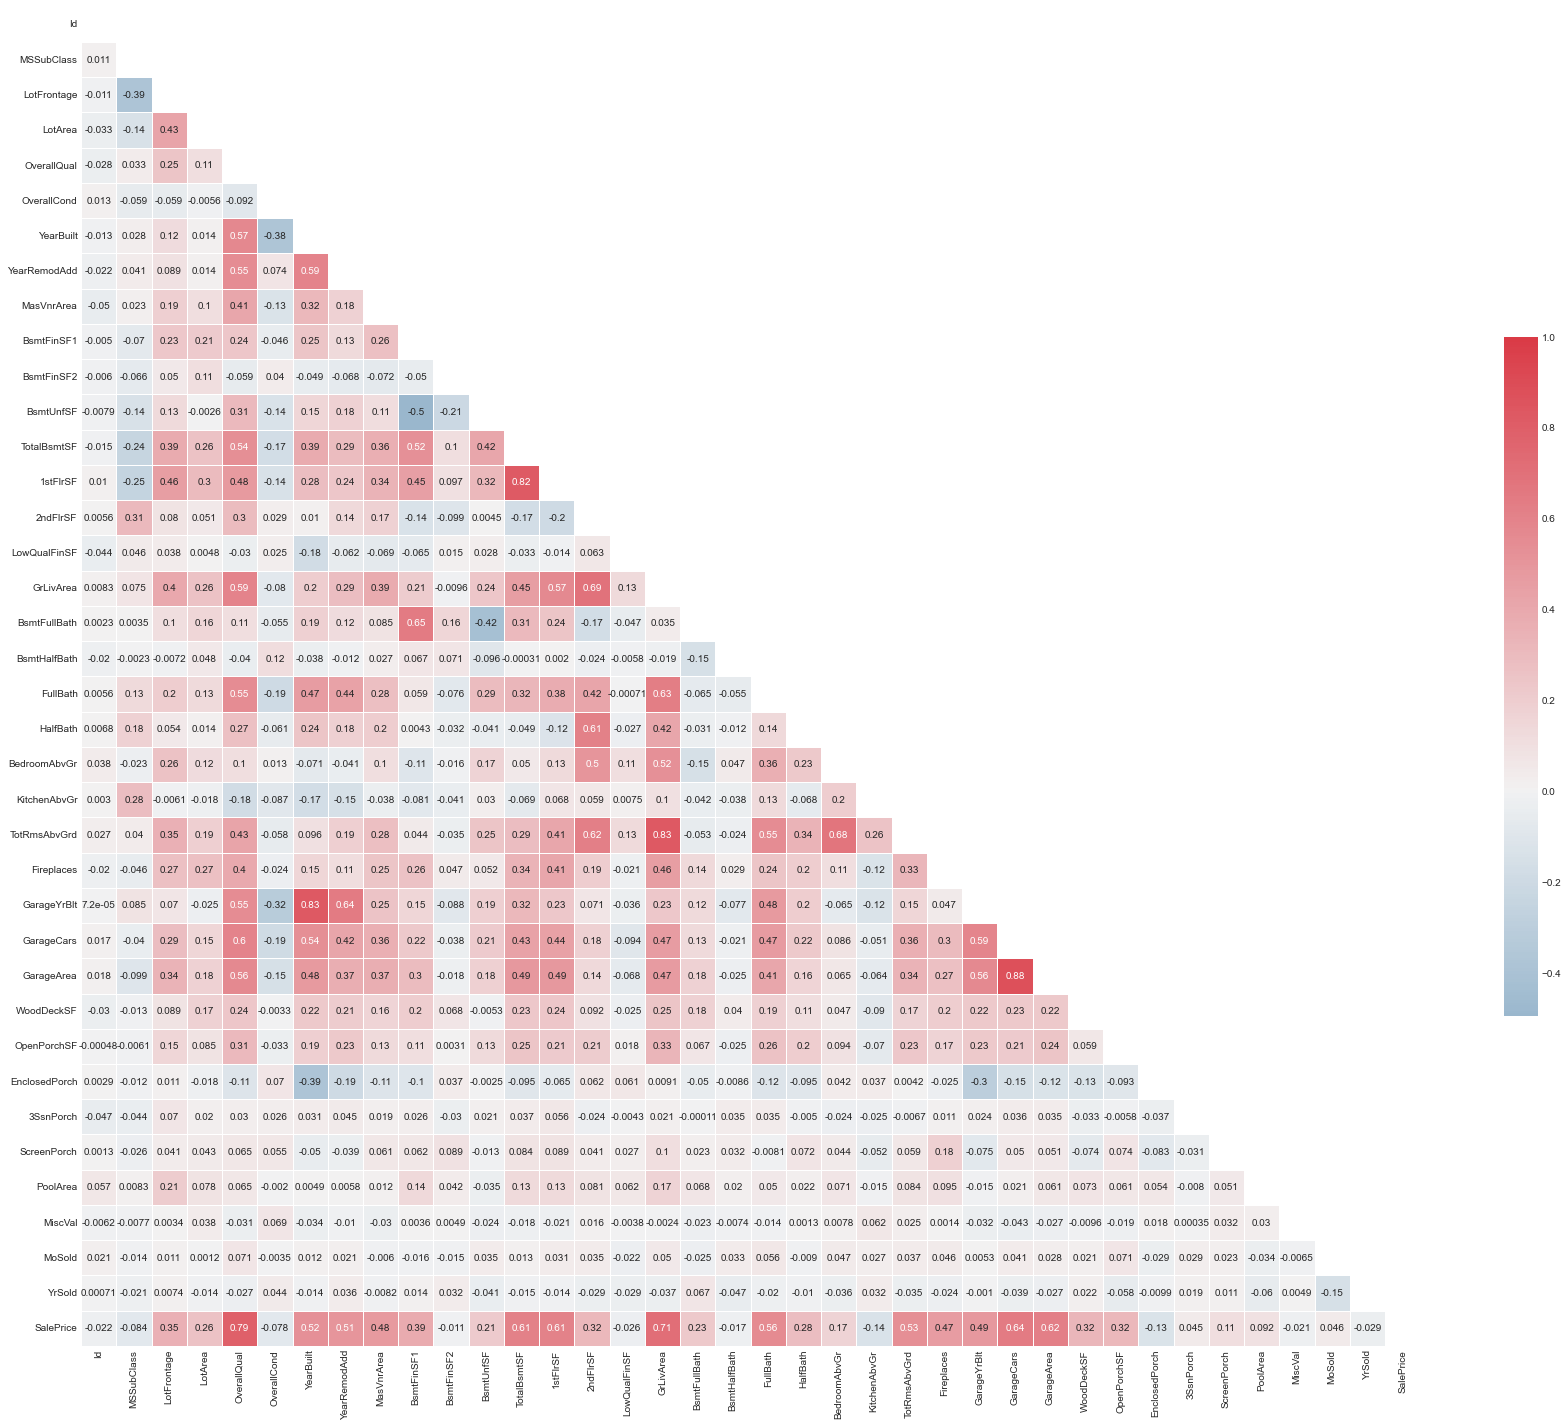

In [277]:
# Correlation Matrix

# Aiming to See which Variables have the greatest correlation coefficient with Sale Price and which other explanoatory variables have solid correlations with each other which may throw off our model. 

frame, axes = plt.subplots(figsize=(30, 25))
mat = training_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [278]:
# Variable Analysis

def sale_price_variable_analysis(comparable_variable):
    figure, ax = plt.subplots(1, 3, figsize = (20, 8))
    sns.stripplot(data=training_data, x = comparable_variable, y='SalePrice', ax = ax[0])
    sns.violinplot(data=training_data, x = comparable_variable, y='SalePrice', ax = ax[1])
    sns.boxplot(data=training_data, x = comparable_variable, y='SalePrice', ax = ax[2])
    plt.title(label=(comparable_variable+" & SalePrice: Analysis"), loc='center')
    plt.show()

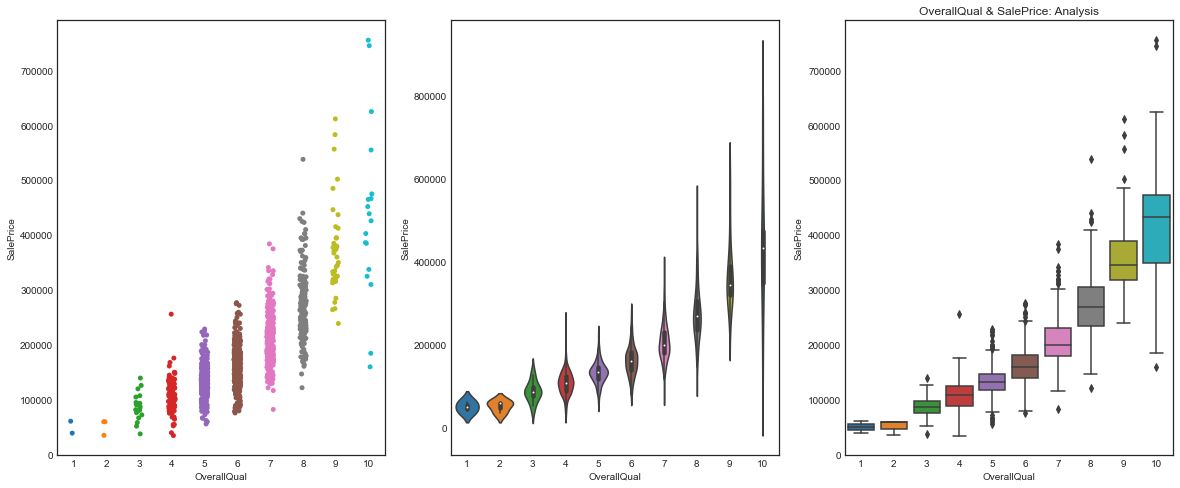

In [279]:
# Analyzing Overall Quality
sale_price_variable_analysis('OverallQual')

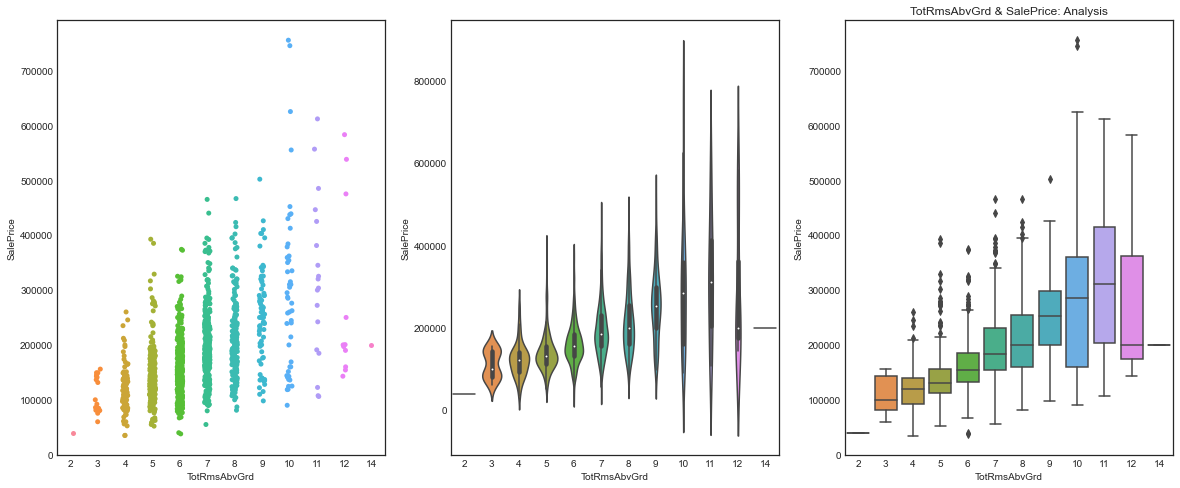

In [280]:
# Analyzing Total Rooms Above Ground
sale_price_variable_analysis('TotRmsAbvGrd')

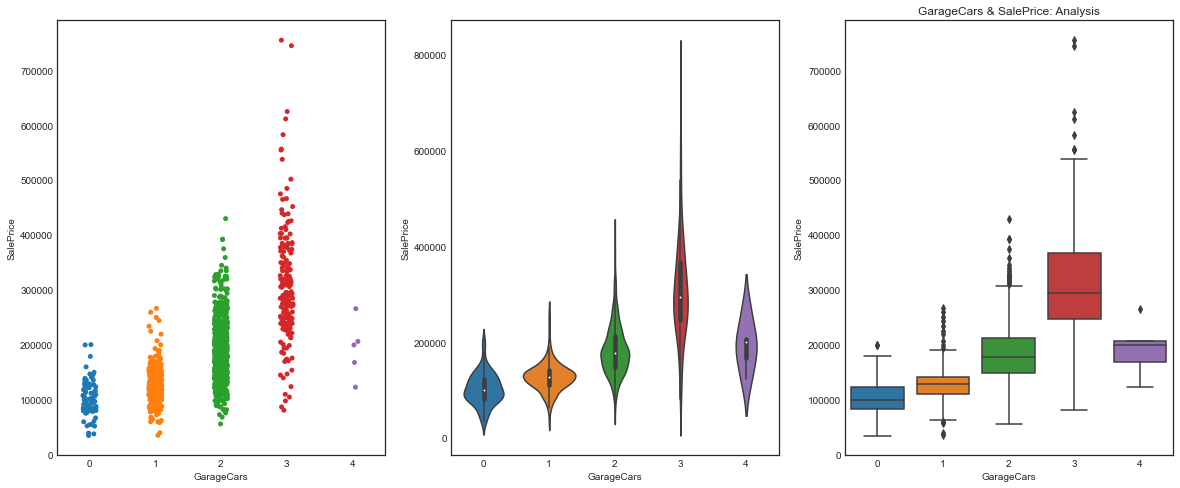

In [281]:
sale_price_variable_analysis('GarageCars')

In [282]:
# Pearson_GrLiv = 0.71
# plt.figure(figsize = (12,6))
# sns.regplot(data=training_data, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
# plt.title('GrLivArea vs SalePrice', fontsize = 12)
# plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
# plt.show()

def sale_price_variable_regression(comparable_variable):
    plt.figure(figsize = (12,6))
    sns.regplot(data=training_data, x = comparable_variable, y = "SalePrice", scatter_kws={'alpha':.2})
    plt.title(comparable_variable + ' vs. SalePrice', fontsize=12)
    plt.show()


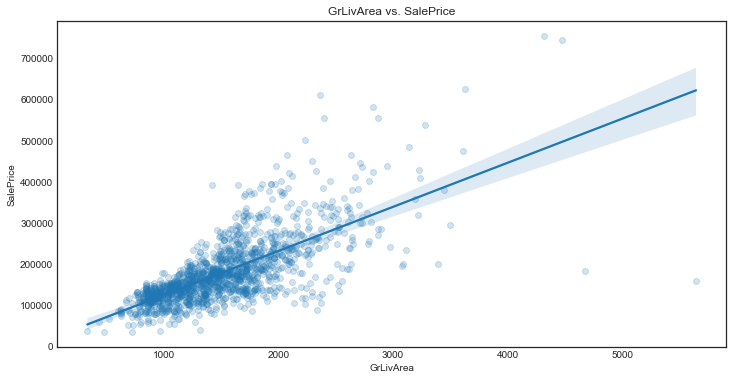

In [283]:
sale_price_variable_regression('GrLivArea')


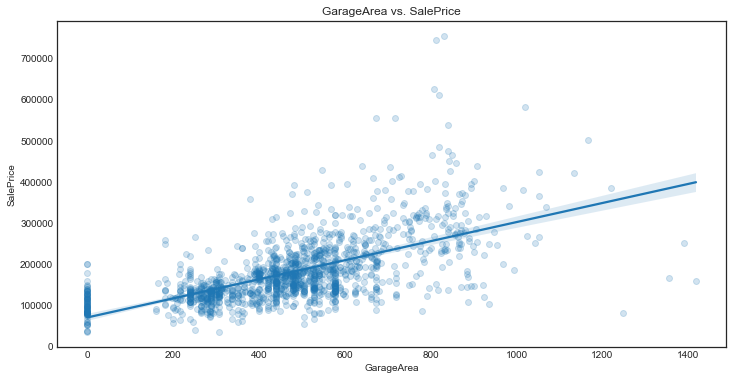

In [284]:
sale_price_variable_regression('GarageArea')

In [285]:
def barplot_comparison(comparable_variable):
    plt.figure(figsize = (12,6))
    sns.barplot(x=comparable_variable, y="SalePrice", data=training_data, estimator = np.median)
    plt.title('Median of Sale Price by '+ comparable_variable, fontsize = 12)
    plt.xlabel(comparable_variable, fontsize = 10)
    plt.ylabel('Median Price', fontsize =10)
    plt.show()

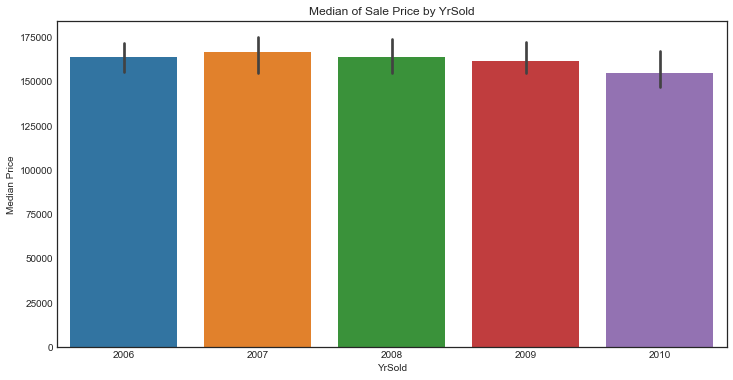

In [286]:
barplot_comparison("YrSold")

In [322]:
# Separate Target and Features
target = training_data['SalePrice']
test_id = testing_data['Id']
testing = testing_data.drop(['Id'],axis = 1)
training_data_dropped = training_data.drop(['SalePrice'], axis = 1)

test_train = pd.concat([training_data_dropped, testing], axis=0, sort=False)

In [323]:
nan = pd.DataFrame(test_train.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')


In [324]:
# Separating Target and Features
target = training_data['SalePrice']
test_id = testing_data['Id']
test = testing_data.drop(['Id'],axis = 1)
training_data2 = training_data.drop(['SalePrice'], axis = 1)

# Concatenating train & test set

train_test = pd.concat([training_data2,test], axis=0, sort=False)

In [325]:
# Looking at NaN % within the data

nan = pd.DataFrame(train_test.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan

,NaN_sum,feat,Perc(%),Usability
BsmtUnfSF,1,BsmtUnfSF,0.068493,Keep
GarageArea,1,GarageArea,0.068493,Keep
GarageCars,1,GarageCars,0.068493,Keep
KitchenQual,1,KitchenQual,0.068493,Keep
TotalBsmtSF,1,TotalBsmtSF,0.068493,Keep
BsmtFinSF2,1,BsmtFinSF2,0.068493,Keep
BsmtFinSF1,1,BsmtFinSF1,0.068493,Keep
SaleType,1,SaleType,0.068493,Keep
Exterior2nd,1,Exterior2nd,0.068493,Keep
Exterior1st,1,Exterior1st,0.068493,Keep


In [332]:
print(len(train_test.columns))

80


In [291]:
# Null Plots

def null_frequencies():
    plt.figure(figsize = (36, 18))
    sns.barplot(x = nan['feat'], y = nan['Perc(%)'])
    plt.xticks(rotation = 45)
    plt.title('Features Frequencies')
    plt.xlabel('Features')
    plt.ylabel('Percentage of Origianl Data that is Null ')
    plt.show()

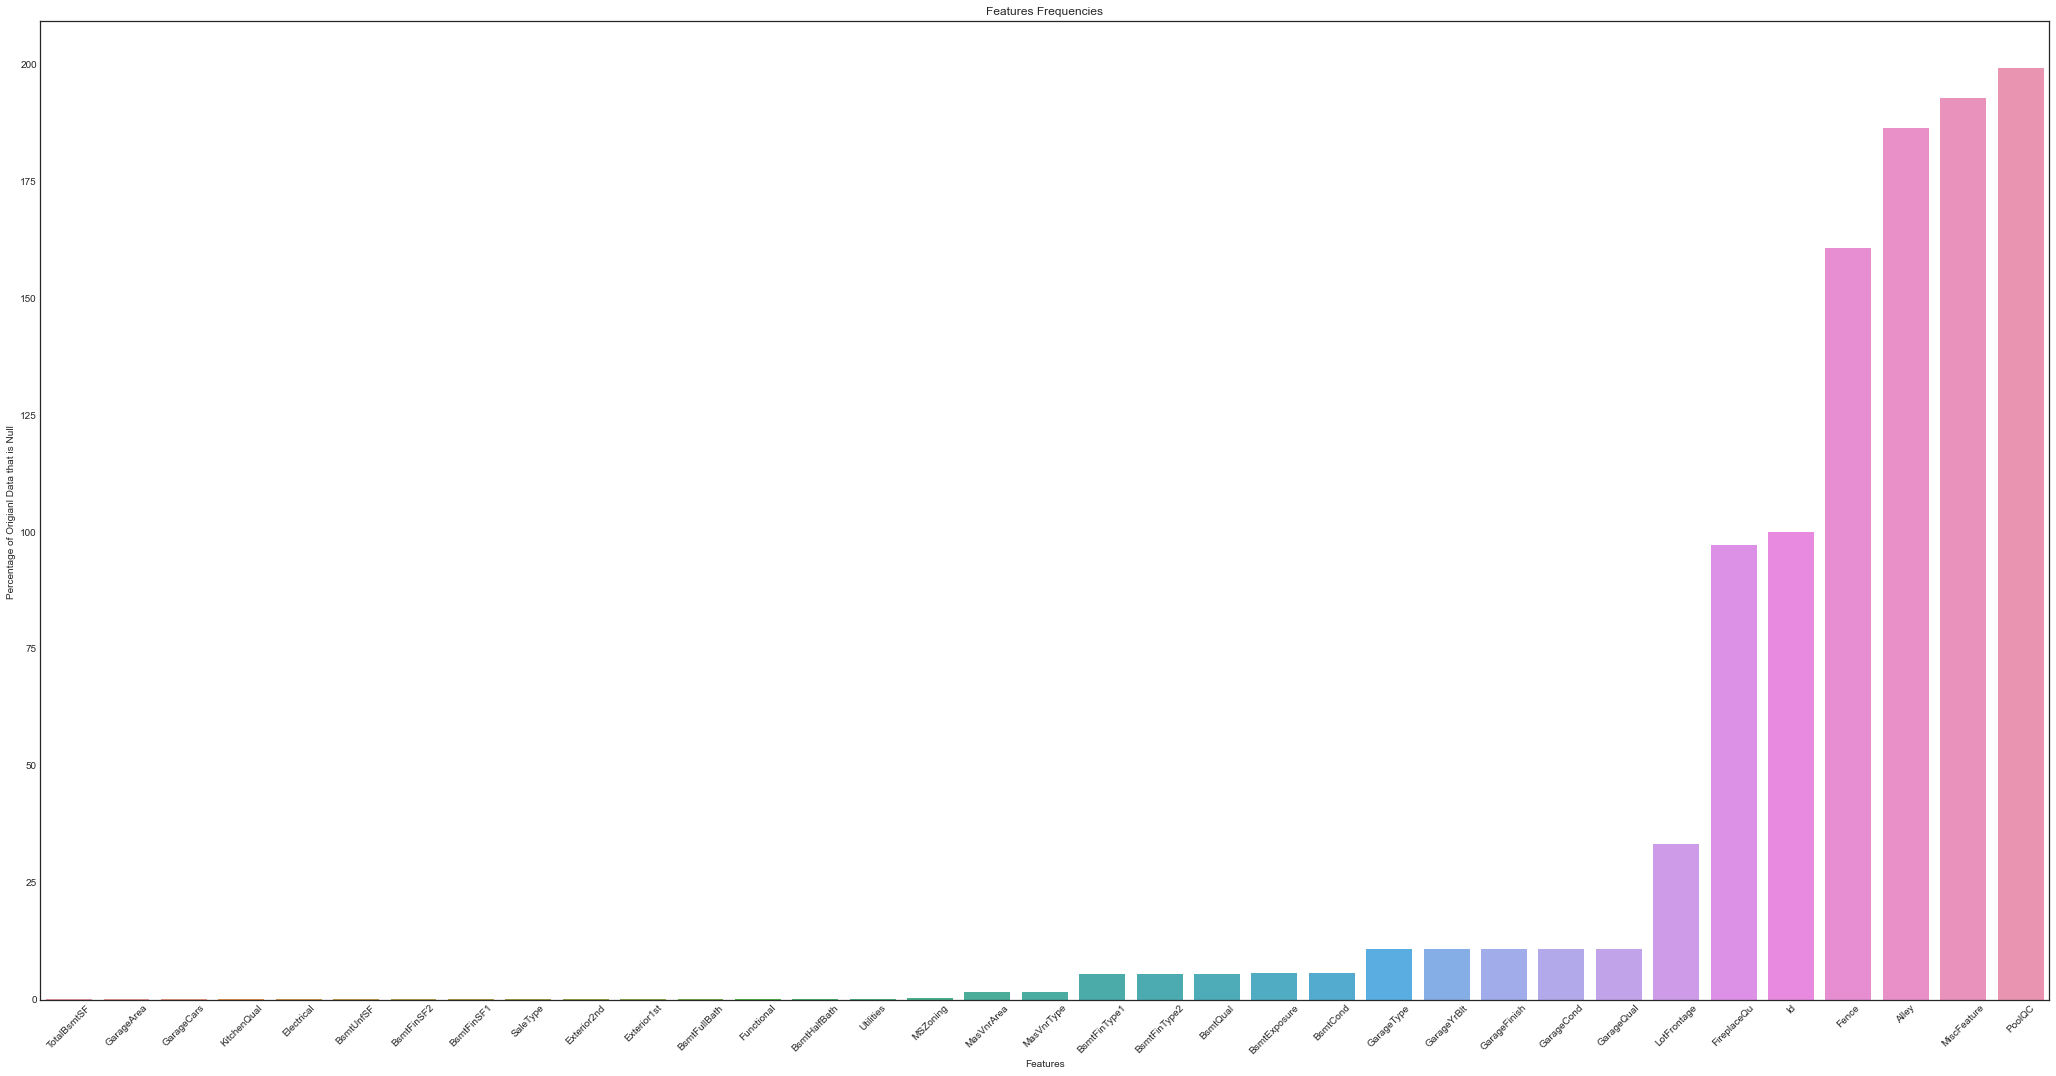

In [292]:
null_frequencies()

In [293]:
# Seperating Nan's Representing False and Nan's representing None.
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# Filling Categorical NaN ( That we know how to fill due to the description file )

train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test['FireplaceQu'] = train_test['FireplaceQu'].fillna("None")
train_test['Fence'] = train_test['Fence'].fillna("None")
train_test['MiscFeature'] = train_test['MiscFeature'].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')


In [310]:
# Removing Variables with majority None for the data type.
# Removing the useless variables
useless = ['GarageYrBlt','YearRemodAdd']
train_test = train_test.drop(useless, axis = 1)


# Imputing with KnnRegressor (we can also use different Imputers)

def impute_knn(df):
    ttn = train_test.select_dtypes(include=[np.number])
    ttc = train_test.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])

    return pd.concat([ttn,ttc],axis=1)

train_test = impute_knn(train_test)

objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))

# # Checking NaN presence

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])


KeyError: "['GarageYrBlt' 'YearRemodAdd'] not found in axis"

In [311]:

train_test = train_test.dropna()

# ** Feature Engineering **

In [312]:
train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]

train_test["SqFtPerRoom"] = train_test["HighQualSF"] / train_test['TotRmsAbvGrd']




In [313]:
train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                                 train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

# Converting non-numeric predictors stored as numbers into string

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# Creating dummy variables from categorical features

train_test_dummy = pd.get_dummies(train_test)

# Fetch all numeric features

#train_test['Id'] = train_test['Id'].apply(str)
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation

for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

1460


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


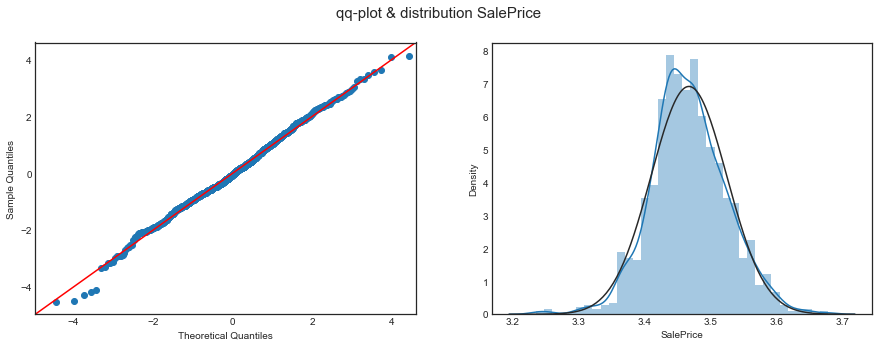

In [314]:
# SalePrice after transformation

target_log = np.log1p(target)
target_log = np.sqrt(target_log)
print(len(target_log))

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

In [298]:


train_test_dummy = train_test_dummy.dropna()
split = len(train_test_dummy)//2

train = train_test_dummy[:split]
test = train_test_dummy[1459:]
print(len(train))
print(len(test))
test['Id'] = test_id

# Creation of the RMSE metric:

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    print(len(model), len(train), len(target_log))
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

1459
1460



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [299]:

kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']



# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression

svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

TypeError: object of type 'BayesianRidge' has no len()

In [ ]:
# Linear Regression

lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Train-Test split the data

X_train,X_val,y_train,y_val = train_test_split(train,target_log,test_size = 0.1,random_state=42)

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                    eval_set = (X_val,y_val),
                    plot=True,
                    verbose = 0)

In [ ]:
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

In [ ]:
# Features' importance of our model

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

In [ ]:
# Plotting top 20 features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

In [ ]:
# Feature importance Interactive Plot

train_pool = Pool(X_train)
val_pool = Pool(X_val)

explainer = shap.TreeExplainer(cat_model) # insert your model
shap_values = explainer.shap_values(train_pool) # insert your train Pool object

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], X_train.iloc[:200,:])

# The plot represents just a slice of the Training data (200 observations)

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
# Features' Interactions

train_data = Pool(X_train)

interaction = cat_model.get_feature_importance(train_data, type="Interaction")
column_names = X_train.columns.values
interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
interaction.head(20)

In [ ]:
# Catboost default paramters

cat_model.get_all_params()

In [ ]:
# Preforming a Random Grid Search to find the best combination of parameters

grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostRegressor()
randomized_search_result = final_model.randomized_search(grid,
                                                         X = X_train,
                                                         y= y_train,
                                                         verbose = False,
                                                         plot=True)


In [ ]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}

cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                        eval_set = (X_val,y_val),
                        plot=True,
                        verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(y_val, catf_pred)

In [ ]:
catf_score

In [ ]:
# Test CSV Submission

test_pred = cat_f.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred
submission.head()

In [ ]:
# Saving the results in a csv file

submission.to_csv("result.csv", index = False, header = True)